In [7]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cross_validation
from imutils import paths
import numpy as np
import pandas as pd
import argparse
import imutils
import cv2
import os
import math

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [8]:
def image_to_feature_vector(image, size=(64, 64)):
	# resize the image to a fixed size, then flatten the image into
	# a list of raw pixel intensities
	return cv2.resize(image, size).flatten()

In [9]:
def extract_color_histogram(image, bins=(8, 8, 8)):
	# extract a 3D color histogram from the HSV color space using
	# the supplied number of `bins` per channel
	hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
	hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
		[0, 180, 0, 256, 0, 256])

	# handle normalizing the histogram if we are using OpenCV 2.4.X
	if imutils.is_cv2():
		hist = cv2.normalize(hist)

	# otherwise, perform "in place" normalization in OpenCV 3 (I
	# personally hate the way this is done
	else:
		cv2.normalize(hist, hist)

	# return the flattened histogram as the feature vector
	return hist.flatten()

======================================================================================================
# Load and Cleanup Data
======================================================================================================

In [10]:
dataset = "./classes/kNN_data/"
# grab the list of images that we'll be describing
print("[INFO] describing images...")
imagePaths = list(paths.list_images(dataset))
print "[INFO] " + str(len(list(paths.list_images(dataset)))) + " images found!"

[INFO] describing images...
[INFO] 6000 images found!


In [5]:
# initialize the raw pixel intensities matrix, the features matrix,
# and labels list
rawImages = []
features = []
labels = []

# loop over the input images
for (i, imagePath) in enumerate(imagePaths):
	# load the image and extract the class label (assuming that our
	# path as the format: /path/to/dataset/{class}.{image_num}.jpg
	image = cv2.imread(imagePath)
	label = imagePath.split(os.path.sep)[-1].split(".")[0]

	# extract raw pixel intensity "features", followed by a color
	# histogram to characterize the color distribution of the pixels
	# in the image
	pixels = image_to_feature_vector(image)
	hist = extract_color_histogram(image)

	# update the raw images, features, and labels matricies,
	# respectively
	rawImages.append(pixels)
	features.append(hist)
	labels.append(label)

	# show an update every 1,000 images
	if i > 0 and i % 1000 == 0:
		print("[INFO] processed {}/{}".format(i, len(imagePaths)))

[INFO] processed 1000/6000
[INFO] processed 2000/6000
[INFO] processed 3000/6000
[INFO] processed 4000/6000
[INFO] processed 5000/6000


In [11]:
from collections import Counter
Counter(labels)

Counter({'adidas': 1500, 'jordan': 1500, 'newbalance': 1500, 'nike': 1500})

======================================================================================================
# Train the kNN Model
======================================================================================================

In [12]:
#64*64*3 colors
# rawImages: Images flattened to a single list
# labels: Brands for the given images
# features: Color histogram

X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(features,
                                                                   labels, 
                                                                   test_size=.1, 
                                                                   random_state=1337)
print "Length of Validation Set:" + str(len(Y_val))
print "Length of Train Set:" + str(len(Y_train))
print "Ratio: " + str(len(Y_val) / float(len(Y_train)))

Length of Validation Set:600
Length of Train Set:5400
Ratio: 0.111111111111


In [41]:
imagePaths[X_val[0]]

TypeError: only integer arrays with one element can be converted to an index

In [15]:
## Train the KNN model
print "Training KNN Model..."
## n_jobs=-1: Use all cores
## n_neighbors = Number of Neighbors
n_neighbors = math.ceil(math.sqrt(len(rawImages)))

model = KNeighborsClassifier(n_neighbors=n_neighbors,
                             weights = 'distance',
                             n_jobs=-1)
model.fit(X_train, Y_train)

Training KNN Model...


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=78.0, p=2,
           weights='distance')

In [16]:
## Model with no weights
model2 = KNeighborsClassifier(n_neighbors=n_neighbors,
                             n_jobs=-1)
model2.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=78.0, p=2,
           weights='uniform')

In [17]:
## Predict on the validation set using the KNN model.
validations_predictions = model.predict(X_val)
print validations_predictions

/Users/waihamyee/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:72: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return [func(*args, **kwargs) for func, args, kwargs in self.items]


['nike' 'nike' 'jordan' 'nike' 'newbalance' 'newbalance' 'nike'
 'newbalance' 'newbalance' 'adidas' 'adidas' 'nike' 'adidas' 'nike' 'nike'
 'adidas' 'nike' 'adidas' 'nike' 'newbalance' 'adidas' 'nike' 'adidas'
 'adidas' 'nike' 'nike' 'adidas' 'adidas' 'nike' 'newbalance' 'jordan'
 'newbalance' 'adidas' 'nike' 'newbalance' 'adidas' 'newbalance' 'adidas'
 'adidas' 'adidas' 'newbalance' 'nike' 'adidas' 'jordan' 'jordan' 'jordan'
 'adidas' 'nike' 'jordan' 'newbalance' 'newbalance' 'jordan' 'jordan'
 'newbalance' 'newbalance' 'adidas' 'nike' 'adidas' 'nike' 'newbalance'
 'nike' 'newbalance' 'newbalance' 'adidas' 'adidas' 'jordan' 'nike'
 'adidas' 'nike' 'nike' 'adidas' 'newbalance' 'nike' 'adidas' 'nike'
 'jordan' 'adidas' 'nike' 'adidas' 'jordan' 'newbalance' 'nike' 'adidas'
 'nike' 'newbalance' 'newbalance' 'nike' 'nike' 'jordan' 'jordan' 'nike'
 'adidas' 'nike' 'jordan' 'jordan' 'nike' 'nike' 'nike' 'jordan'
 'newbalance' 'nike' 'nike' 'nike' 'adidas' 'newbalance' 'newbalance'
 'newbalan

In [18]:
## Can be used for visualizing misclassifications!
results = pd.DataFrame()

results.insert(0,'actual',Y_val)
results.insert(1,'predictions',validations_predictions)

misclassified = results[results['actual'] != results['predictions']].count()[0] / float(len(X_val))
misclassified

0.505

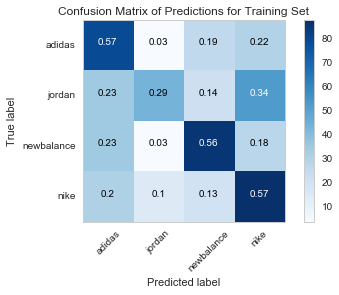

In [90]:
## Plot the confusion matrix for the new data predictions
classes = list(set(labels))
classes.sort()

cm = confusion_matrix(Y_val, validations_predictions)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix of Predictions for Training Set")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, round(cm[i, j],2),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [20]:
## Give me the 5 nearest neighbors of the first two items in the validation set
pd.DataFrame(model.kneighbors(X_val[0:5], n_neighbors=5, return_distance=False))

,0,1,2,3,4
0,144,4991,1742,23,4613
1,1238,1160,333,2757,5072
2,4771,4936,569,3711,4650
3,877,996,4819,4362,4213
4,2705,558,2682,1195,314


In [34]:
## Translation:
print train_test_split
print imagePaths[0]
print imagePaths[144]
print imagePaths[4991]
print imagePaths[1742]
print imagePaths[23]
print imagePaths[4613]

<built-in method index of list object at 0x103e9de18>
./classes/kNN_data/adidas.10.png
./classes/kNN_data/adidas.11523.png
./classes/kNN_data/nike.11220.png
./classes/kNN_data/jordan.12936.png
./classes/kNN_data/adidas.10334.png
./classes/kNN_data/nike.10276.png


In [21]:
model.score(X_val,Y_val)

0.495

In [22]:
model.score(X_train,Y_train)

1.0

In [23]:
model2.score(X_val,Y_val)

0.45166666666666666

In [24]:
model2.score(X_train,Y_train)

0.4601851851851852

======================================================================================================
# Testing on New Data
======================================================================================================

In [79]:
new_images_test = []
new_labels = []
newDataPath = list(paths.list_images("./classes/kNN_new_data/"))
newDataPath.sort()

for (i, newDataPath) in enumerate(newDataPath):    
    image = cv2.imread(newDataPath)
    new_images = extract_color_histogram(image)
    
    nlabels = newDataPath.split(os.path.sep)[-1].split(".")[0]
    new_images_test.append(new_images)
    new_labels.append(nlabels)

In [80]:
from collections import Counter
Counter(new_labels)

Counter({'adidas': 8, 'jordan': 8, 'newbalance': 18, 'nike': 9})

In [81]:
new_data_predictions = model.predict(new_images_test)
rslt = new_labels == new_data_predictions
new_data_df = pd.DataFrame()

new_data_df.insert(0,'actual',new_labels)
# new_data_df.insert(1, 'image_name', map(lambda x: x.split(os.path.sep)[-1], newDataPath[0:len(new_labels)]))
new_data_df.insert(1,'predictions',new_data_predictions)
new_data_df.insert(2,'results',rslt)


print "Accuracy of the Model:" + str(model.score(new_images_test, new_labels))

new_data_df

Accuracy of the Model:0.302325581395


,actual,predictions,results
0,adidas,jordan,False
1,adidas,adidas,True
2,adidas,nike,False
3,adidas,adidas,True
4,adidas,adidas,True
5,adidas,adidas,True
6,adidas,nike,False
7,adidas,jordan,False
8,jordan,newbalance,False
9,jordan,jordan,True


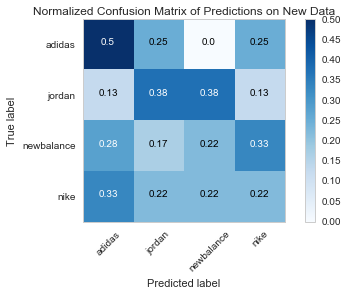

In [91]:
## Plot the confusion matrix for the new data predictions
classes = list(set(new_labels))
classes.sort()

cm = confusion_matrix(new_labels, new_data_predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix of Predictions on New Data")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.tight_layout()
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, round(cm[i, j],2),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    

np.set_printoptions(precision=2)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [51]:
prediction_nearest_neighbors = pd.DataFrame(model.kneighbors(new_images_test[1], n_neighbors=107, return_distance=False))
prediction_nearest_neighbors

/Users/waihamyee/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
0,3702,1589,5237,3902,2667,2967,2381,3391,618,997,...,1069,867,5117,2643,1526,1269,1475,1886,5069,3476


In [58]:
## Translate the predicted nearest neighbors
newDataPath = list(paths.list_images("./classes/kNN_new_data/"))
newDataPath.sort()

# print newDataPath[0]

# extract_color_histogram(imagePaths[3702])

# plt.imshow(imagePaths[1589])
# plt.imshow(imagePaths[5237])
# plt.imshow(imagePaths[3902])
# plt.imshow(imagePaths[2667])

In [ ]:
newDataPath = list(paths.list_images("./classes/kNN_new_data/"))
newDataPath

In [ ]:
nearest_neighbors = list(model.kneighbors(new_images_test[8], n_neighbors=107, return_distance=False)[0])
NN_images = [imagePaths[x] for x in nearest_neighbors]

processNN = map(lambda x: x.split(os.path.sep)[-1].split(".")[0], NN_images)
[ (i,processNN.count(i)) for i in set(processNN) ]
